Hamilton's equation:
q'  =  p
p'  =  -q**2 + q


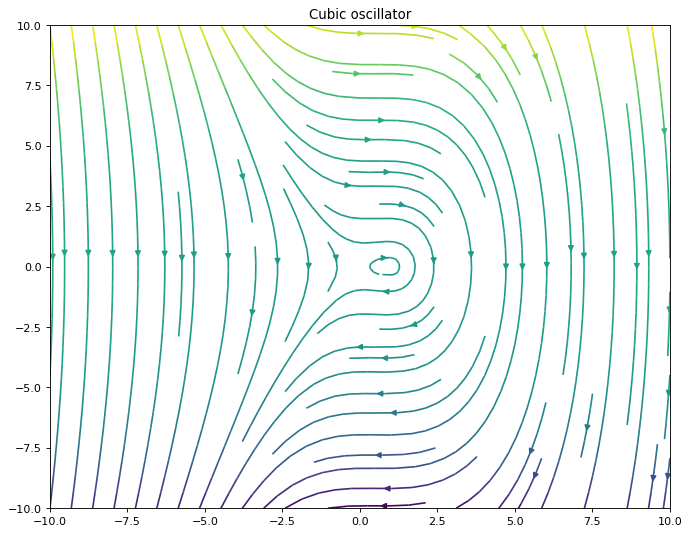

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

#Here we define the symbols we are gonna use for the Hamiltonian H. We are using natural units, too.
p, q = sp.symbols('p q')
H = p**2/2 - q**2/2 + q**3/3


fig = plt.figure(figsize=(10, 8), dpi=80)

x,y = np.meshgrid(np.linspace(-10,10,30),np.linspace(-10,10,30))

#We print Hamilton's equations
print('Hamilton\'s equation:')
print('q\'  = ', sp.diff(H, p)) 
print('p\'  = ', -sp.diff(H, q))

#Here we "transform", using lambdify function, symbols into array to be used in streamplot 
pdot = sp.lambdify(q, -sp.diff(H, q), 'numpy')
qdot = sp.lambdify(p, sp.diff(H, p), 'numpy')

#Hamiltonian field
u = qdot(y)
v = pdot(x)

#This is used to produce the fading in the color
E = sp.lambdify([p, q], H, 'numpy')

plt.streamplot(x,y,u,v, color = E(x, y), cmap = 'viridis')
plt.title('Cubic oscillator')
plt.savefig('Cubic_oscillator.pdf')
plt.show()